# Dymanics in the three-body decay

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

Activated C:\Users\mikha\Documents\Introduction2AmplitudeAnalysis\Project.toml
Info Introduction2AmplitudeAnalysis 0.0.1 activated, master requested


In [125]:
using ThreeBodyDecay
using Plots
using TypedTables
theme(:wong, bottom_margin=3*Plots.PlotMeasures.mm)

1. Scattering amplitude: d.o.f.
2. $|M|^2 = 1$ $\Rightarrow$ flat Dalitz
3. Subchannel resonances: bands on the Dalitz plot
4. Projections and reflections
5. Intensity along the line band

## 0. Intro
A recently observed exciting result (the CERN [Seminar](https://indico.cern.ch/event/900975/) last Tuesday)

A | B
- | - 
![alt](figs/fig1.png) | ![alt](figs/fig2.png)

How the projections would look like?
$$
\frac{d N}{d m^2(D^- K^+)} \text{  and  } \frac{d N}{d m^2(D^- D^+)}
$$

## 1. Distribution on the Dalitz Plot

In [42]:
ms = ThreeBodyMasses(m0=5.279,m1=1.87,m2=0.519,m3=1.87)

ThreeBodyMasses
  m0: Float64 5.279
  m1: Float64 1.87
  m2: Float64 0.519
  m3: Float64 1.87


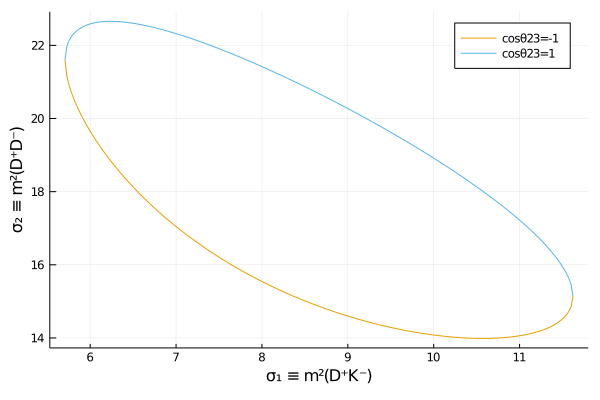

In [136]:
plot(border23(ms), lab=["cosθ23=-1" "cosθ23=1"], xlab="σ₁ ≡ m²(D⁺K⁻)", ylab="σ₂ ≡ m²(D⁺D⁻)")

In [78]:
function AI(σs)
    return 1.0
end

AII (generic function with 1 method)

Let's put two resonances in the $D^+D^-$ invariant mass
 - $\psi(3770)$ [PDG](https://pdglive.lbl.gov/Particle.action?init=0&node=M053&home=MXXX025)
 - $\chi_{c2}(3930)$ [PDG](https://pdglive.lbl.gov/Particle.action?init=0&node=M050&home=MXXX025)

In [115]:
const mχ = 3.930; const Γχ = 0.035;
const mψ = 3.770; const Γψ = 0.027;

In [116]:
ABW(σ;m,Γ) = m*Γ/(m^2-σ-1im*m*Γ)
# 
function AII(σs)
    cχ = 1.0 # χc2(3930)
    cψ = 1.0 # ψ(3770)
    A_chain2 = cψ*ABW(σs.σ2; m=mψ, Γ=Γψ) + cχ*ABW(σs.σ2; m=mχ, Γ=Γχ)
    #
    return A_chain2
end

AII (generic function with 1 method)

## 2. Plotting methods
#### plot $|A|^2$ in a grid

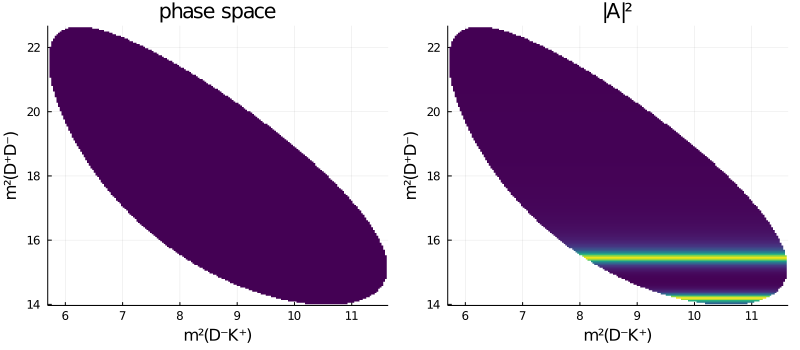

In [130]:
let
    σ1v = range(lims1(ms)..., length=200)
    σ2v = range(lims2(ms)..., length=200)
    plot(layout=grid(1,2), size=(800,350), xlab="m²(D⁻K⁺)", ylab="m²(D⁺D⁻)")
    calv = [Kibble(Invariants(ms;σ1=σ1,σ2=σ2), ms) > 0 ?
        NaN : AI(Invariants(ms;σ1=σ1,σ2=σ2)) for σ2 in σ2v, σ1 in σ1v]
    heatmap!(sp=1,σ1v, σ2v, abs2.(calv), colorbar=false, title="phase space")
    calv = [Kibble(Invariants(ms;σ1=σ1,σ2=σ2), ms) > 0 ?
        NaN : AII(Invariants(ms;σ1=σ1,σ2=σ2)) for σ2 in σ2v, σ1 in σ1v]
    heatmap!(sp=2,σ1v, σ2v, abs2.(calv), colorbar=false, title="|A|²")
end

#### 4.2 Weight the phase space MC with the $|A|^2$

In [131]:
sample = flatDalitzPlotSample(ms; Nev=100000);

In [132]:
Table(nt.(sample))

Table with 3 columns and 100000 rows:
      σ1       σ2       σ3
    ┌──────────────────────────
 1  │ 5.90384  21.5956  7.6316
 2  │ 7.91022  17.2362  9.98455
 3  │ 9.01906  19.9899  6.12202
 4  │ 7.78629  17.3165  10.0282
 5  │ 6.85844  19.2     9.07255
 6  │ 8.1298   19.2606  7.74058
 7  │ 6.03271  20.1575  8.94074
 8  │ 9.1511   17.3546  8.62529
 9  │ 8.18859  19.3204  7.62205
 10 │ 9.15566  17.9948  7.98058
 11 │ 9.22217  15.773   10.1358
 12 │ 9.42944  15.1211  10.5804
 13 │ 7.49632  21.5871  6.04755
 14 │ 7.82849  21.4203  5.88218
 15 │ 8.90205  18.3853  7.84367
 16 │ 6.27946  20.9451  7.90649
 17 │ 10.6377  17.575   6.91837
 18 │ 7.94687  16.5973  10.5868
 19 │ 6.67562  22.4133  6.04208
 20 │ 7.2663   18.7988  9.06586
 21 │ 10.0245  17.1455  7.96104
 22 │ 8.37851  17.4106  9.34194
 23 │ 8.47943  18.4153  8.23625
 ⋮  │    ⋮        ⋮        ⋮

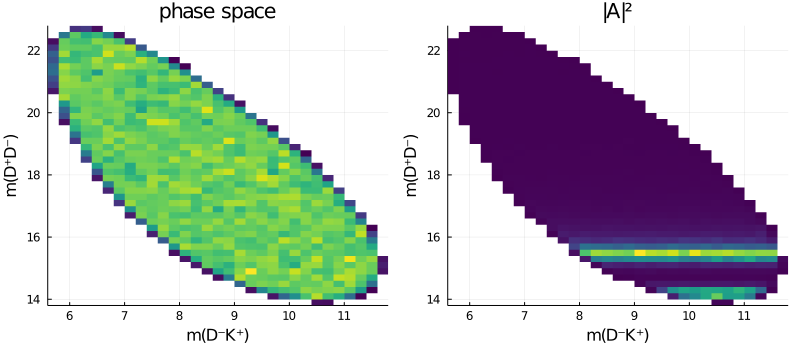

In [133]:
plot(layout=grid(1,2), size=(800,350), xlab="m(D⁻K⁺)", ylab="m(D⁺D⁻)", colorbar=false)
histogram2d!(sp=1,
    getproperty.(sample, :σ1),
    getproperty.(sample, :σ2), bins=50, title="phase space")
histogram2d!(sp=2,
    getproperty.(sample, :σ1),
    getproperty.(sample, :σ2),
    weights = abs2.(AII.(sample)), bins=50, title="|A|²")

## 4. Projections and Reflections

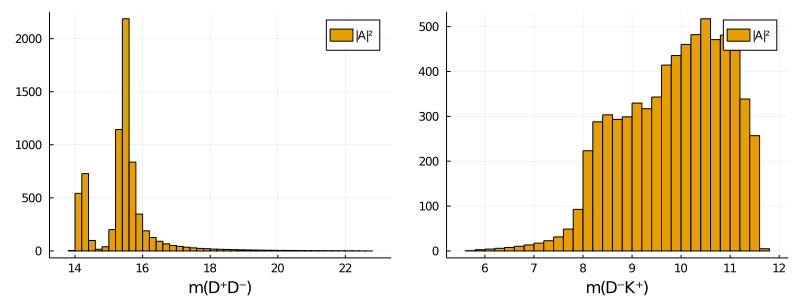

In [134]:
plot(layout=grid(1,2), size=(800,300),
    histogram(getproperty.(sample, :σ2),
        weights = abs2.(AII.(sample)), bins=50, xlab="m(D⁺D⁻)", lab="|A|²"),
    histogram(getproperty.(sample, :σ1),
        weights = abs2.(AII.(sample)), bins=50, xlab="m(D⁻K⁺)", lab="|A|²"))